### Concrete Compressive Strength 

### Data Type: multivariate
 
Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

### Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None

### Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable 

### Import the libs

In [1]:
# Import the numerical algebra libs
import pandas as pd
import numpy as np
# Import visualization libs
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
data = pd.read_csv("Concrete_Data.csv")

### 1. Exploratory Data Analysis

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# Rename the column 
data.rename(columns=dict(zip(data.columns, ['cement', 'slag', 'flyash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'compressivestrength'])), inplace=True)

In [5]:
print('Shape before deleting duplicate values:', data.shape)

# Removing duplicate rows if any
data=data.drop_duplicates()
print('Shape After deleting duplicate values:', data.shape)

Shape before deleting duplicate values: (1030, 9)
Shape After deleting duplicate values: (1005, 9)


In [6]:
# Observing the summarized information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cement               1005 non-null   float64
 1   slag                 1005 non-null   float64
 2   flyash               1005 non-null   float64
 3   water                1005 non-null   float64
 4   superplastic         1005 non-null   float64
 5   coarseagg            1005 non-null   float64
 6   fineagg              1005 non-null   float64
 7   age                  1005 non-null   int64  
 8   compressivestrength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [7]:
# Looking at the descriptive statistics of the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
flyash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
compressivestrength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [8]:
data.nunique()

cement                 278
slag                   185
flyash                 156
water                  195
superplastic           111
coarseagg              284
fineagg                302
age                     14
compressivestrength    845
dtype: int64

Observations
1. All of the data in the dataset is numerical
2. No null value
3. Age data appears to have outliers because max value is very large as compared to 75% value

#### Visualize distribution of all the variables in the dataset

#### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002382EF13BE0>,
      dtype=object)

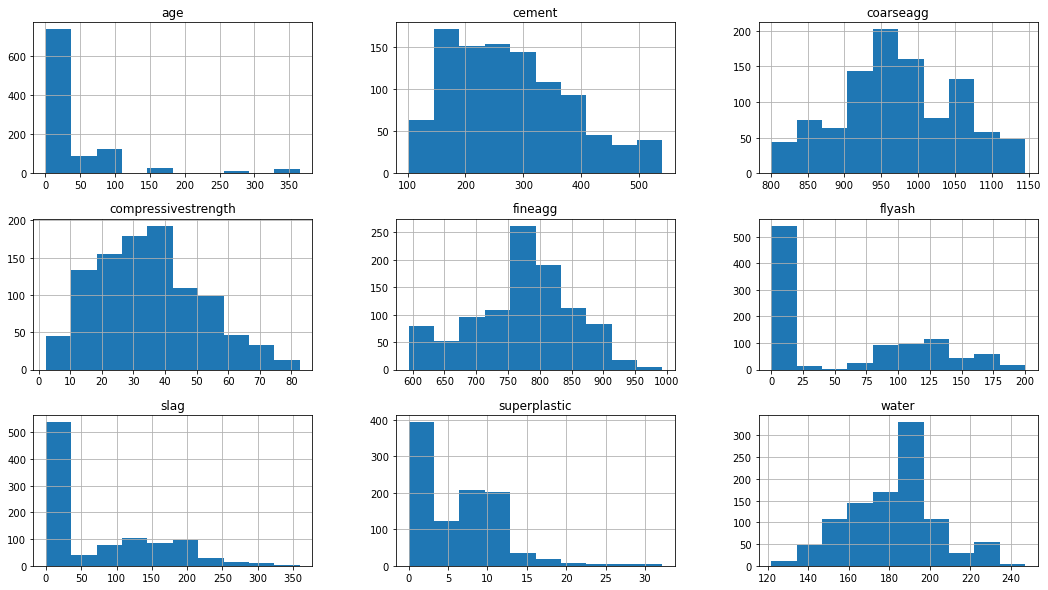

In [9]:
data.hist(['cement', 'slag', 'flyash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'compressivestrength'], figsize=(18,10))

Observations

1. Data distribution for a single continuous variable.
2. Distribution of cement appears nearly normal
3. Age, Slag, flyash is positively skewed, they might have outlier
4. Water and Superplastic have near normal distributions
5. Compressivestrength is normally distributed

#### Box plots

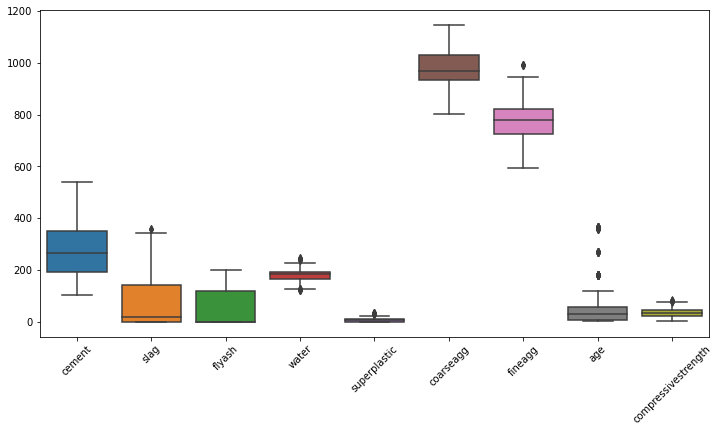

In [10]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Observations

1. Age, Slag, water, superplastic, fineagg have outlier

#### Missing values treatment

In [11]:
data.isnull().sum()


cement                 0
slag                   0
flyash                 0
water                  0
superplastic           0
coarseagg              0
fineagg                0
age                    0
compressivestrength    0
dtype: int64

Observation

No missing values in this data.

### 2. Bi-variate analysis

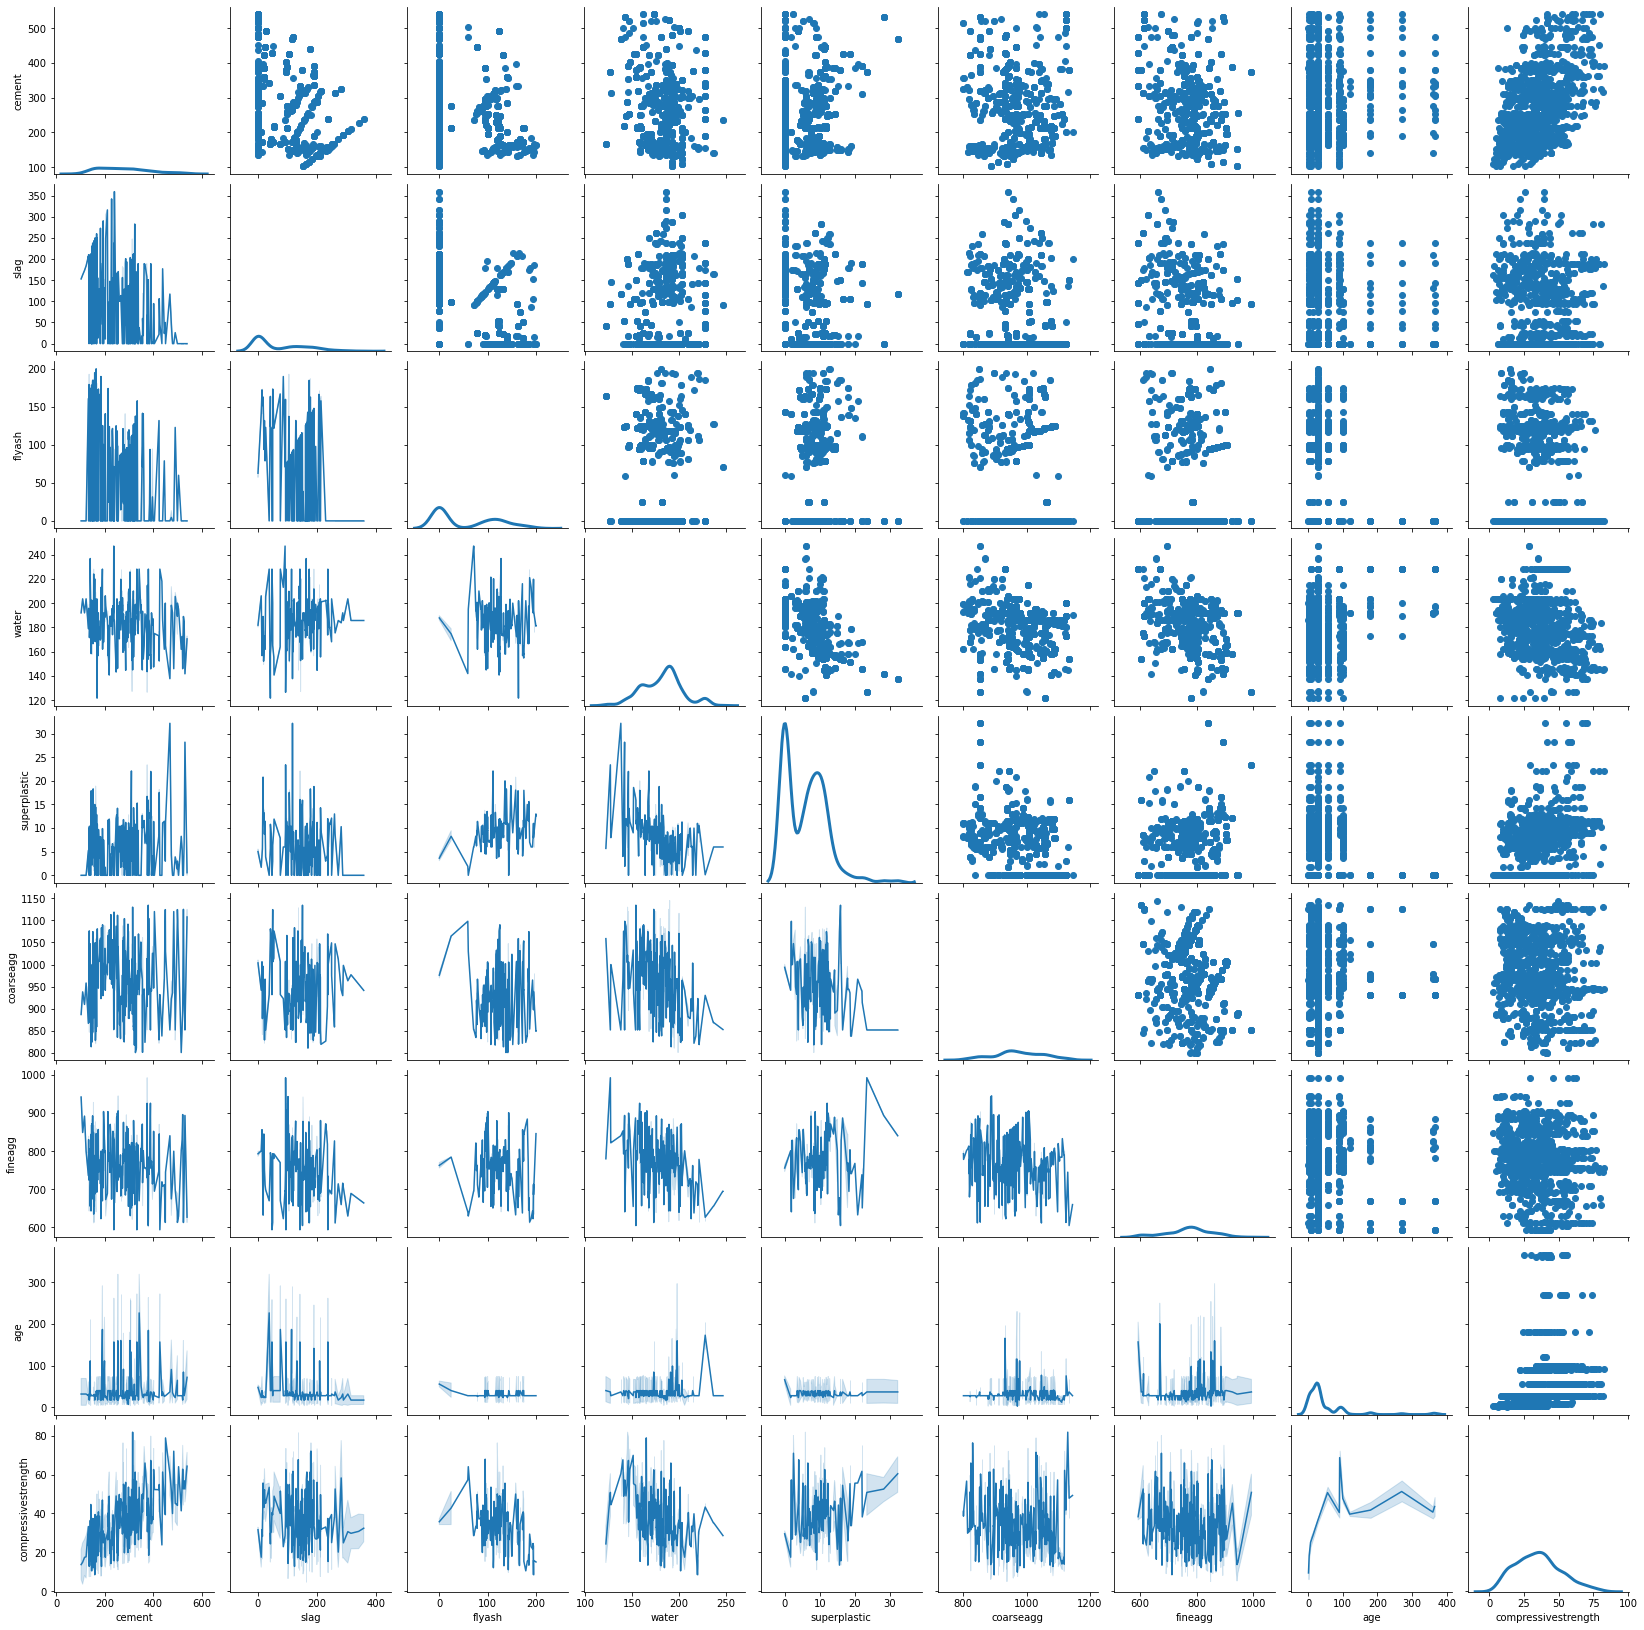

In [12]:
pairgrid = sns.PairGrid(data)
pairgrid.map_upper(plt.scatter)
pairgrid.map_lower(sns.lineplot)
pairgrid.map_diag(sns.kdeplot, lw=3, legend=True);

Observation 

1. Cement has strong correlation with strength
2. Slag has weak correalation with strength
3. Flyash, coarseagg and fineagg are also weak predictors
4. Water appears to have a negative correlation with strength
5. Superplastic appears to have positive correlation with strength
6. Age also has strong correlation with strength

#### Heat map

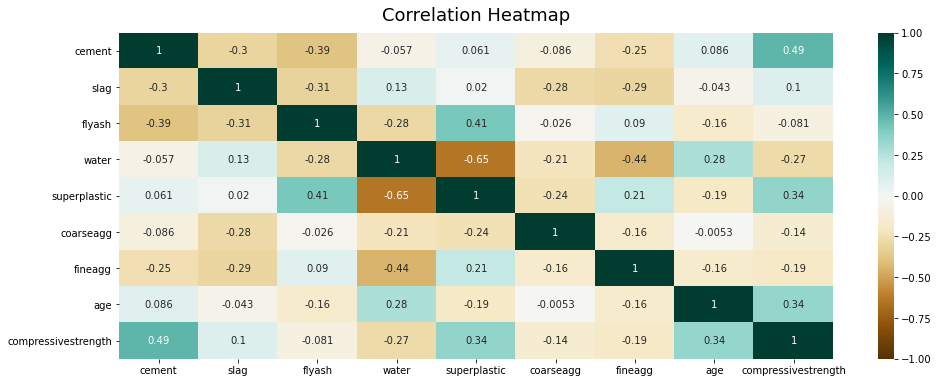

In [13]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Observations

1. It seems that cement, Super plastic and age have slighlt strong positive correlation with strength
2. Slag has week positive correlation with strength
3. As expected, water, flyash, fineagg and coarseagg have strong negative correlation

### 3. Feature Engineering techniques

There is a opportunity to extract new feature from this dataset which is water/ cement ratio. The higher the water/cement ratio, the greater the initial spacing between the cement grains and the greater the volume of residual voids not filled by hydration products. Hence, lower water-cement ratio in concrete mix results higher compressive strength of concrete (Singh et al., 2015). Lets calculate water cement ration and see the result how it impact compressive strength of a concrete.

Singh, S.B., Munjal, P. and Thammishetti, N., 2015. Role of water/cement ratio on strength development of cement mortar. Journal of Building Engineering, 4, pp.94-100.

In [14]:
test_data =data

In [15]:
test_data ['Water / Cement Ratio'] = test_data ['water'] / test_data['cement']

In [16]:
test_data.head()

,cement,slag,flyash,water,superplastic,coarseagg,fineagg,age,compressivestrength,Water / Cement Ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.966767


In [17]:
# Creating the correlation matrix
CorrelationData=test_data.corr()
CorrelationData

,cement,slag,flyash,water,superplastic,coarseagg,fineagg,age,compressivestrength,Water / Cement Ratio
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283,-0.876062
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374,0.389812
flyash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648,0.229721
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624,0.315054
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209,-0.197239
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717,-0.059537
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448,0.082993
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367,-0.032873
compressivestrength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000,-0.489401
Water / Cement Ratio,-0.876062,0.389812,0.229721,0.315054,-0.197239,-0.059537,0.082993,-0.032873,-0.489401,1.000000


There is a moderate negative relationship negative correlation between water/ cement ration in compressivestrentgh. ence, lower water-cement ratio in concrete mix results higher compressive strength of concrete

In [18]:
# Filtering only those columns where absolute correlation > 0.3 with Target Variable
CorrelationData['compressivestrength'][abs(CorrelationData['compressivestrength']) > 0.3 ]

cement                  0.488283
superplastic            0.344209
age                     0.337367
compressivestrength     1.000000
Water / Cement Ratio   -0.489401
Name: compressivestrength, dtype: float64

Above are the final selected columns

#### This is a regression problem as its continous data. We will not use simple linear model as there are multiple indpendent variables responsible for concretestrength.  

In [19]:
SelectedColumns=['cement','superplastic','age', 'Water / Cement Ratio']
# Selecting final columns
DataForML=test_data[SelectedColumns]
DataForML.head()

,cement,superplastic,age,Water / Cement Ratio
0,540.0,2.5,28,0.300000
1,540.0,2.5,28,0.300000
2,332.5,0.0,270,0.685714
3,332.5,0.0,365,0.685714
4,198.6,0.0,360,0.966767


#### Splitting the data into Training and Testing sample

In [199]:
# Separate Target Variable and Predictor Variables
TargetVariable='compressivestrength'
Predictors=['cement','superplastic','age', 'Water / Cement Ratio']

X=DataForML[Predictors].values
y=test_data[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [200]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(703, 4)
(703,)
(302, 4)
(302,)


### 4. Creating the Model and Tuning It

### 1. We will try the following algorithms:

1. Multiple Linear Regression
3. Random forest
4. Ada boosting
5. Gradient Boosting

##### 1. Multiple Linear Regression

In [26]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
MLR = metrics.r2_score(y_train, LREG.predict(X_train))
print('R2 Value:',MLR)

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['compressivestrength']-TestingDataResults['Predictedcompressivestrength']))/ TestingDataResults['compressivestrength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

MLRAccuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', MLRAccuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values_MLR=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values_MLR)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values_MLR.mean(),2))


#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Multiple Linear Regression'], 'Final accuracy':round(Accuracy_Values_MLR.mean(),2) , 'Mean Accuracy': MLRAccuracy, 'R2 Value': MLR})
resultsDf = resultsDf[['Method', 'Final accuracy', 'Mean Accuracy', 'R2 Value']]
resultsDf

LinearRegression()
R2 Value: 0.4606272690821316

##### Model Validation and Accuracy Calculations ##########
   compressivestrength  Predictedcompressivestrength
0                26.94                          31.0
1                31.25                          33.0
2                32.72                          21.0
3                33.42                          35.0
4                54.90                          70.0
Mean Accuracy on test data: 65.42357149905894
Median Accuracy on test data: 78.36888344380569

Accuracy values for 10-fold Cross Validation:
 [66.19657328 68.44457202 65.41302172 66.21431258 70.60886553 46.10680719
 49.06334626 55.39443052 64.03950691 63.87268874]

Final Average Accuracy of the model: 61.54


,Method,Final accuracy,Mean Accuracy,R2 Value
0,Multiple Linear Regression,61.54,65.423571,0.460627


##### 2. Random Forest

RandomForestRegressor(max_depth=5)
R2 Value: 0.8277278911987619

##### Model Validation and Accuracy Calculations ##########
   compressivestrength  Predictedcompressivestrength
0                26.94                          38.0
1                31.25                          39.0
2                32.72                          22.0
3                33.42                          35.0
4                54.90                          48.0
Mean Accuracy on test data: 78.6432530855945
Median Accuracy on test data: 83.81867273619851

Accuracy values for 10-fold Cross Validation:
 [79.80152297 77.19281656 83.05453304 78.66348202 82.0295553  67.16108415
 62.2838287  73.0177528  72.12775377 70.78164155]

Final Average Accuracy of the model: 74.61


,Method,Final accuracy,Mean Accuracy,R2 Value
0,Multiple Linear Regression,61.54,65.423571,0.460627
0,Random Forest,74.61,78.643253,0.827728


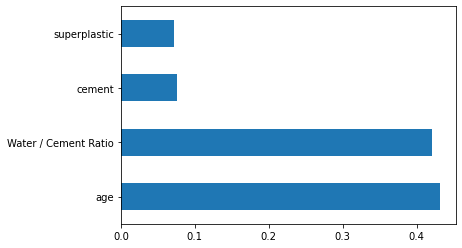

In [27]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=5, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics

# Measuring Goodness of fit in Training data
RF_r2 = metrics.r2_score(y_train, RF.predict(X_train))

print('R2 Value:',RF_r2)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['compressivestrength']-TestingDataResults['Predictedcompressivestrength']))/TestingDataResults['compressivestrength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

RF_Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', RF_Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values_RF=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values_RF)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values_RF.mean(),2))

#Store the accuracy results for each model in a dataframe for final comparison
RFDf = pd.DataFrame({'Method':['Random Forest'], 'Final accuracy':round(Accuracy_Values_RF.mean(),2) , 'Mean Accuracy': RF_Accuracy, 'R2 Value': RF_r2})
resultsDf = resultsDf[['Method', 'Final accuracy', 'Mean Accuracy', 'R2 Value']]
resultsDf = pd.concat([resultsDf, RFDf])
resultsDf

##### 3. AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9842175580944802

##### Model Validation and Accuracy Calculations ##########
   compressivestrength  Predictedcompressivestrength
0                26.94                          29.0
1                31.25                          32.0
2                32.72                          23.0
3                33.42                          34.0
4                54.90                          47.0
Mean Accuracy on test data: 83.94866465466556
Median Accuracy on test data: 89.85924913645182

Accuracy values for 10-fold Cross Validation:
 [77.37342034 79.77751687 78.71720933 78.38984378 81.21360446 68.53585443
 69.24854879 81.06282773 87.56742529 89.30861652]

Final Average Accuracy of the model: 79.12


,Method,Final accuracy,Mean Accuracy,R2 Value
0,Multiple Linear Regression,61.54,65.423571,0.460627
0,Random Forest,74.61,78.643253,0.827728
0,ADA Boost,79.12,83.948665,0.984218


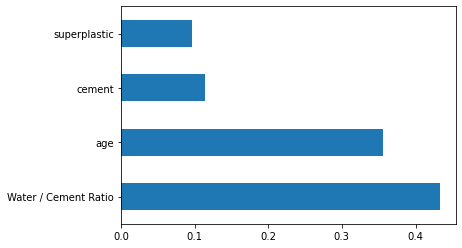

In [28]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 10 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
Ada_r2=metrics.r2_score(y_train, AB.predict(X_train))
print('R2 Value:',Ada_r2)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['compressivestrength']-TestingDataResults['Predictedcompressivestrength']))/TestingDataResults['compressivestrength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy_ada =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy_ada) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values_ada=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values_ada)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values_ada.mean(),2))


#Store the accuracy results for each model in a dataframe for final comparison
ADADf = pd.DataFrame({'Method':['ADA Boost'], 'Final accuracy':round(Accuracy_Values_ada.mean(),2) , 'Mean Accuracy': Accuracy_ada, 'R2 Value': Ada_r2})
resultsDf = resultsDf[['Method', 'Final accuracy', 'Mean Accuracy', 'R2 Value']]
resultsDf = pd.concat([resultsDf, ADADf])
resultsDf

##### 4. Gradient Boost

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)
R2 Value: 0.8818987040923572

##### Model Validation and Accuracy Calculations ##########
   compressivestrength  Predictedcompressivestrength
0                26.94                          34.0
1                31.25                          36.0
2                32.72                          22.0
3                33.42                          37.0
4                54.90                          50.0
Mean Accuracy on test data: 81.1808504119793
Median Accuracy on test data: 86.8260016835

Accuracy values for 10-fold Cross Validation:
 [81.5331365  78.10798442 81.94637231 80.29002152 81.61099309 70.224844
 64.94395448 76.24868022 74.32868812 73.7856199 ]

Final Average Accuracy of the model: 76.3


,Method,Final accuracy,Mean Accuracy,R2 Value
0,Multiple Linear Regression,61.54,65.423571,0.460627
0,Random Forest,74.61,78.643253,0.827728
0,ADA Boost,79.12,83.948665,0.984218
0,Gradient Boosting,76.30,81.180850,0.881899


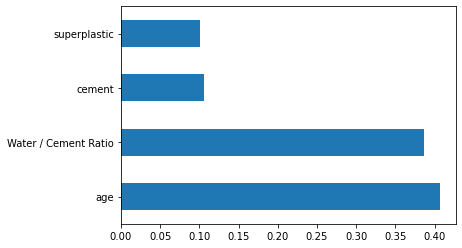

In [29]:
# Gradient Boosting 
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
from sklearn import ensemble
RegModel=ensemble.GradientBoostingRegressor(**params)

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
GB=RegModel.fit(X_train,y_train)
prediction=GB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
GBboost= metrics.r2_score(y_train, GB.predict(X_train))
print('R2 Value:',GBboost)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(GB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['compressivestrength']-TestingDataResults['Predictedcompressivestrength']))/TestingDataResults['compressivestrength'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy_GB =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy_GB) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values_GB=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values_GB)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values_GB.mean(),2))

#Store the accuracy results for each model in a dataframe for final comparison
GradientDf = pd.DataFrame({'Method':['Gradient Boosting'], 'Final accuracy':round(Accuracy_Values_GB.mean(),2) , 'Mean Accuracy': Accuracy_GB, 'R2 Value': GBboost})
resultsDf = resultsDf[['Method', 'Final accuracy', 'Mean Accuracy', 'R2 Value']]
resultsDf = pd.concat([resultsDf, GradientDf])
resultsDf

Observation

1. It seems that AdaBoost perform well. It clearly the best model with high accuracy and R2 value.

2. The most important feature which impact compressive strength of concrete is age following by water/cement ratio

R-squared is how well the regression model fits the observed data. For example, an r-squared of 98% reveals that 98% of the data fit the regression model. Generally, a higher r-squared indicates a better fit for the model.Therefore, in this case Adaboost is the best model

#### Hyper parameter tuning

At this point we can conclude that Ada boost is perfect fit to predict the strength of concrete based on the given dataset.

Now we can tune the hyper parameters for Adaboost

In [201]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': list(range(50, 500, 50)),
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']

 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=10,return_train_score= True, n_jobs=-1, verbose=2, n_iter=500)

pre_gs_inst.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 135 is smaller than n_iter=500. Running 135 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  7.2min finished


RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(), n_iter=500, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450]},
                   return_train_score=True, verbose=2)

In [202]:
pre_gs_inst.best_params_

{'n_estimators': 200, 'loss': 'square', 'learning_rate': 0.1}

In [203]:
# Choosing Decision Tree with 10 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=200, loss='square', base_estimator=DTR ,learning_rate=0.1)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
Ada_r2=metrics.r2_score(y_train, AB.predict(X_train))
print('R2 Value:',Ada_r2)

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['compressivestrength']-TestingDataResults['Predictedcompressivestrength']))/TestingDataResults['compressivestrength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy_ada =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy_ada) 

ADADf_Hyperparemeter = pd.DataFrame({'TuneHyperParameters':['Yes'],'Mean Accuracy': Accuracy_ada, 'R2 Value': Ada_r2})
ADADf_Hyperparemeter = ADADf_Hyperparemeter[['TuneHyperParameters','Mean Accuracy', 'R2 Value']]
ADADf_without_Hyperparemeter=ADADf[['Mean Accuracy','R2 Value']]
ADADf_Hyperparemeter = pd.concat([ADADf_Hyperparemeter, ADADf_without_Hyperparemeter])
ADADf_Hyperparemeter

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, loss='square', n_estimators=200)
R2 Value: 0.9799024152800239

##### Model Validation and Accuracy Calculations ##########
Mean Accuracy on test data: 84.02370626950166


,TuneHyperParameters,Mean Accuracy,R2 Value
0,Yes,84.023706,0.979902
0,NaN,81.644404,0.976808


Observation

1. In the above study, we find that in order to predict the strength of concrete
2. After tune the hyperParameters, the performance of test accuracy increased 3%. 
3. The features that affect the strength are cement, superplastic, water/cement ratio and age
4. The best model is Adaboost
5. It is also recommended that to calculate waster/ cement ratio as it impact significantly in concrete strength.
6. Overall this model can be used in the productio.